# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
pwd

'C:\\Users\\Kevin Pant\\Desktop\\DEEP LEARNING COURSE\\RNN\\Part 3 - Recurrent Neural Networks'

In [3]:
cd C:\Users\Kevin Pant\Desktop\DEEP LEARNING COURSE\RNN\Part 3 - Recurrent Neural Networks

C:\Users\Kevin Pant\Desktop\DEEP LEARNING COURSE\RNN\Part 3 - Recurrent Neural Networks


### Importing the training set:
The input set of RNN

In [10]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #adding .values makes it into a numpy array
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling:

Apply Normalization(MINMAX) as SC instead of Standardisation for RNN 

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

We're going to create a data structure specifying what the RNN will need to remember <br/>

when predicting the next stock price. And this is called the number of time steps.<br/>

It is important to have the right number of time steps because a wrong number of time steps could lead to over fitting or horrible predictions.

## 60 timesteps meaning: <br/>

The RNN is going to look at the 60 stock prices before time T, that is the stock prices between 60 days before time T <br/>

and time T, and based on the trends, it will capture during these 60 previous timesteps, it will try to predict the next output.<br/>

So 60 timesteps of the past information from which our RNN is gonna try to learn and understand some correlations, or some trends, and based on its understanding, it's going to try to predict the next output. <br/>

That is, the stock price at time T plus one.

In [13]:
X_train = [] #input for rnn
y_train = [] # output for rnn
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
#y_train
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

## Explaining X_train and y_train:

Basically for each observation,i.e. for each financial day,<br/>**X_train** will contain the 60 previews stock prices,before that financial day. <br/>

**y_train** will contain the stock price the next financial day.

### Reshaping:

In this dimension what we're gonna add is exactly the unit, that is, the number of predictors we can use to predict what we want. <br/>

Which is the Google Stock Price at time T plus one.

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [22]:
from keras.models import Sequential
from keras.layers import Dense #for output layer
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

In [23]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

**Understanding the 3 arguments:** 

1 Units = 50[no. of LSTM cells we want]<br/>
2 return_sequences = True [because we are building a stacked LSTM which will have several LSTM layers and when you add another LSTM layer
after the one you are creating right now, you have to set the return sequences argument to true.] <br/>

3 input_shape = (X_train.shape[1], 1))): <br/>
that is exactly the shape of the input containing x_train that we created in the last step of the data preprocessing part. It's an input shape in three dimensions, in 3-D,corresponding to the observations, the time steps, and the indicators.

## Dropout explanation:

We're gonna have 20% Dropout, that is the 20% of the neurons of the LSTM layer, will be ignored during the training, that is during the forward propagation and back propagation happening in each iteration of the training.<br/>

Therefore, since 20% of 50 is 10 neurons, that means that 10 neurons will be ignored and dropped out during each iteration of the training.

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [28]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [29]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Important Note:** 

For RNN the recommended "optimizer" is RMSprop ( it is some kind of an advanced stochastic gradient descent optimizer.)

Read Keras Documentation for more inputs

### Fitting the RNN to the Training set

In [30]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0423
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0063
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 12s 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [31]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')##Create dataset
real_stock_price = dataset_test.iloc[:, 1:2].values #Convert into numpy array

In [32]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

**KEY POINTS:**


**(1) We trained our model to be able to predict the stock price at time T+1 ,based on the 60 previous stock prices, therefore, to predict each stock price of each financial day of January, 2017, we will need the 60 previous stock prices of the 60 previous financial days, before the actual day.**

**(2) In order to get at each day of January, 2017, the 60 previous stock prices of the 60 previous days, we will need both the training set and the test set, because we will have some of the 60 days that will be from the training set, because they will be from December 2016, and we will also have some stock prices of the test set, because some of them will come from January 2017, and, therefore, the first thing we need to do now, is some CONCATENATION of the training set and the test set, to be able to get these 60 produced inputs, for each day of January, 2017.**

**(3) Concatenate the original DataFrames that we still have, these are dataset_train, and dataset_test.
From this concatenation,we will get the input of each prediction, that is the 60 produced stock prices at each time T, and this is then what we will scale. 
These are on these inputs.
That's where we'll apply our SC object.
These inputs that we will scale to get the predictions, and that way we are only scaling the input, and we are not changing the actual test values, and this is the right approach to take.**

**Why are we scaling the inputs?**

That is because our RNN was trained on the scaled values of the train set.
Therefore, for consistency of the model we will have to use the scaled input to get our predictions, and the scaled input should be based on the same scaling that we applied,i.e. normalization with our SC object.

**What are Inputs?**

At each time T, or at each financial day of January 2017, we need to get the 60 previous stock prices of the 60 previous financial days.

If you want the stock prices of the three previous months, because there are 20 financial days in one month, and therefore, 60 financial days would make three months.

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# We only want the Opening Google Stock Price
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# How to get to January 3rd opening stock price = len(dataset_total) - len(dataset_test)
#len(dataset_test) is index of last day of JAN'17 we - this by 20 = Jan 3rd(the first day, the first financial day of January, 2017)
inputs = inputs.reshape(-1,1)
#if you don't get this NumPy Array of the format you want,we use ".reshape"


**Imp Note**

Repeat the process of what I did before to obtain the right 3D format that is expected by the neural network.

It is not only expected by the neural network for the training, it is also expected by the neural network for the predictions.

So, whether I apply the fit method to train a regressor or to predict methods to make my regressor predict something, I need to have the right format of inputs and this format is the 3D format that we made previously.

In [34]:
inputs = sc.transform(inputs) # Since RNN was scaled
X_test = [] ##Code taken from X_train & y_train
for i in range(60, 80):# since test set contains only 20 financial days
    X_test.append(inputs[i-60:i, 0]) # 0 = 0 col.
X_test = np.array(X_test)

## Now the 3-d format, taken from X_train above.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## V.imp note:
# We need to inverse the scaling of our predictions

#because our regressor was trained to predict the scaled values of the 
#stock price.To get the original scale of these scaled predicted values
#we simply need to apply the inverse transform method from our s
#caling sc object.

In [35]:
predicted_stock_price

array([[768.83777],
       [765.97217],
       [765.187  ],
       [765.9823 ],
       [768.9207 ],
       [774.45044],
       [780.3096 ],
       [783.70984],
       [784.7277 ],
       [784.38916],
       [783.6738 ],
       [783.03546],
       [782.6841 ],
       [783.05176],
       [783.9543 ],
       [787.7459 ],
       [794.101  ],
       [801.6464 ],
       [806.8679 ],
       [804.9465 ]], dtype=float32)

### Visualising the results

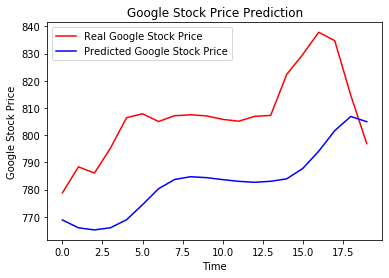

In [36]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Comments: <br/> 


Our model just lags behind because it cannot react to fast, nonlinear changes. This spike here this stock time irregularity, is indeed a fast, nonlinear change to which ourmodel cannot react properly.

That's totally fine because according to the Brownian Motion Mathematical Concept in financial engineering, the future variations of the stock price are independent from the past.

And therefore, this future variation that we see here around the spike, well, is a variation that is totally independent from the previous stock prices

The conclusion is that in the parts of the predictions containing some spikes, our predictions lag behind the actual values because our model cannot reactto fast, nonlinear changes.

On the other hand, for the parts of the predictions containing smooth changes, our model reacts pretty well and manages to follow the upward and downward trends.